In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here we found that some column data are object type some are int so will covert that object type data into float or int in further steps

In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


# DATA ENCODING

now we will do the data encoding of categorical data into numerical value for further analysis

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
label=le.fit_transform(data["Workclass"])
label
data=data.drop("Workclass",axis='columns')
data["Workclass"]=label


In [9]:
le=LabelEncoder()
label=le.fit_transform(data["Education"])
label
data=data.drop("Education",axis='columns')
data["Education"]=label


In [10]:
le=LabelEncoder()
label=le.fit_transform(data["Marital_status"])
label
data=data.drop("Marital_status",axis='columns')
data["Marital_status"]=label


In [11]:
le=LabelEncoder()
label=le.fit_transform(data["Occupation"])
label
data=data.drop("Occupation",axis='columns')
data["Occupation"]=label


In [12]:
le=LabelEncoder()
label=le.fit_transform(data["Relationship"])
label
data=data.drop("Relationship",axis='columns')
data["Relationship"]=label


In [13]:
le=LabelEncoder()
label=le.fit_transform(data["Race"])
label
data=data.drop("Race",axis='columns')
data["Race"]=label


In [14]:
le=LabelEncoder()
label=le.fit_transform(data["Sex"])
label
data=data.drop("Sex",axis='columns')
data["Sex"]=label


In [15]:
le=LabelEncoder()
label=le.fit_transform(data["Native_country"])
label
data=data.drop("Native_country",axis='columns')
data["Native_country"]=label


In [16]:
le=LabelEncoder()
label=le.fit_transform(data["Income"])
label
data=data.drop("Income",axis='columns')
data["Income"]=label
data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
1,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
2,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
3,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0
4,37,284582,14,0,0,40,4,12,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,4,7,2,13,5,4,0,39,0
32556,40,154374,9,0,0,40,4,11,2,7,0,4,1,39,1
32557,58,151910,9,0,0,40,4,11,6,1,4,4,0,39,0
32558,22,201490,9,0,0,20,4,11,4,1,3,4,1,39,0


In [17]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000


here we found the column with there minimum and maximum values with their total count along with mean and standard deviation also we observed that some column has mini to 75% zero values so it is necessary to replace that zero values with the value of mean of column

In [18]:
#replacing the zero values with the mean of the column
data['Capital_gain']=data['Capital_gain'].replace(0,data['Capital_gain'].mean())
data['Capital_loss']=data['Capital_loss'].replace(0,data['Capital_loss'].mean())
data['Workclass']=data['Workclass'].replace(0,data['Workclass'].mean())
data['Education']=data['Education'].replace(0,data['Education'].mean())
data['Marital_status']=data['Marital_status'].replace(0,data['Marital_status'].mean())
data['Occupation']=data['Occupation'].replace(0,data['Occupation'].mean())
data['Relationship']=data['Relationship'].replace(0,data['Relationship'].mean())
data['Race']=data['Race'].replace(0,data['Race'].mean())
data['Sex']=data['Sex'].replace(0,data['Sex'].mean())
data['Native_country']=data['Native_country'].replace(0,data['Native_country'].mean())


In [19]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,2065.506304,170.539970,40.437469,4.086951,10.593344,2.968188,6.944959,2.032434,3.700862,0.890568,37.376261,0.240817
std,13.640642,1.055498e+05,2.572709,7245.938132,384.950157,12.347618,1.108138,3.442851,1.100380,3.911379,1.179248,0.768701,0.155647,6.053011,0.427586
min,17.000000,1.228500e+04,1.000000,114.000000,87.306511,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.669195,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,1077.615172,87.306511,40.000000,4.000000,9.000000,2.000000,4.000000,1.000000,4.000000,0.669195,39.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,1077.615172,87.306511,40.000000,4.000000,11.000000,2.611794,7.000000,1.446376,4.000000,1.000000,39.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,1077.615172,87.306511,45.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000


In [20]:
data.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
Age,1.000000,-0.076646,0.036527,0.074234,0.058061,0.068756,0.039303,-0.019051,-0.258606,-0.006599,-0.168496,0.027009,0.088832,-0.000342,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000640,-0.010309,-0.018770,-0.024152,-0.025926,0.026369,0.000668,-0.000589,-0.053253,0.026882,-0.063536,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.120248,0.080019,0.148127,0.005570,0.267815,-0.101233,0.088071,-0.080782,0.021532,0.012256,0.087574,0.335182
Capital_gain,0.074234,0.000640,0.120248,1.000000,-0.029480,0.076835,0.031999,0.025997,-0.071734,0.021392,-0.029644,0.008648,0.046752,0.007851,0.216691
Capital_loss,0.058061,-0.010309,0.080019,-0.029480,1.000000,0.054383,0.003280,0.012359,-0.065014,0.013085,-0.037921,0.014887,0.045729,0.008903,0.150934
Hours_per_week,0.068756,-0.018770,0.148127,0.076835,0.054383,1.000000,0.046772,0.038904,-0.239563,0.021185,-0.191016,0.044842,0.229312,0.006008,0.229690
Workclass,0.039303,-0.024152,0.005570,0.031999,0.003280,0.046772,1.000000,0.007771,-0.053328,0.012370,-0.040597,0.045425,0.073258,-0.002006,0.004872
Education,-0.019051,-0.025926,0.267815,0.025997,0.012359,0.038904,0.007771,1.000000,-0.016012,-0.036640,0.000617,0.009556,-0.028082,0.087476,0.054205
Marital_status,-0.258606,0.026369,-0.101233,-0.071734,-0.065014,-0.239563,-0.053328,-0.016012,1.000000,-0.008401,0.129977,-0.096371,-0.363311,-0.003085,-0.376278
Occupation,-0.006599,0.000668,0.088071,0.021392,0.013085,0.021185,0.012370,-0.036640,-0.008401,1.000000,-0.047877,-0.000764,0.061471,-0.003619,0.051053


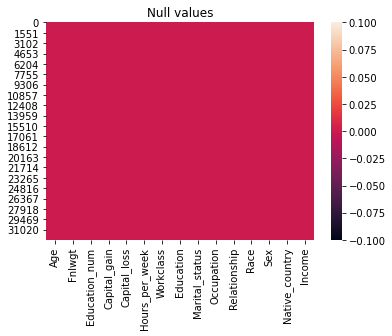

In [21]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

no NULL values present

<AxesSubplot:>

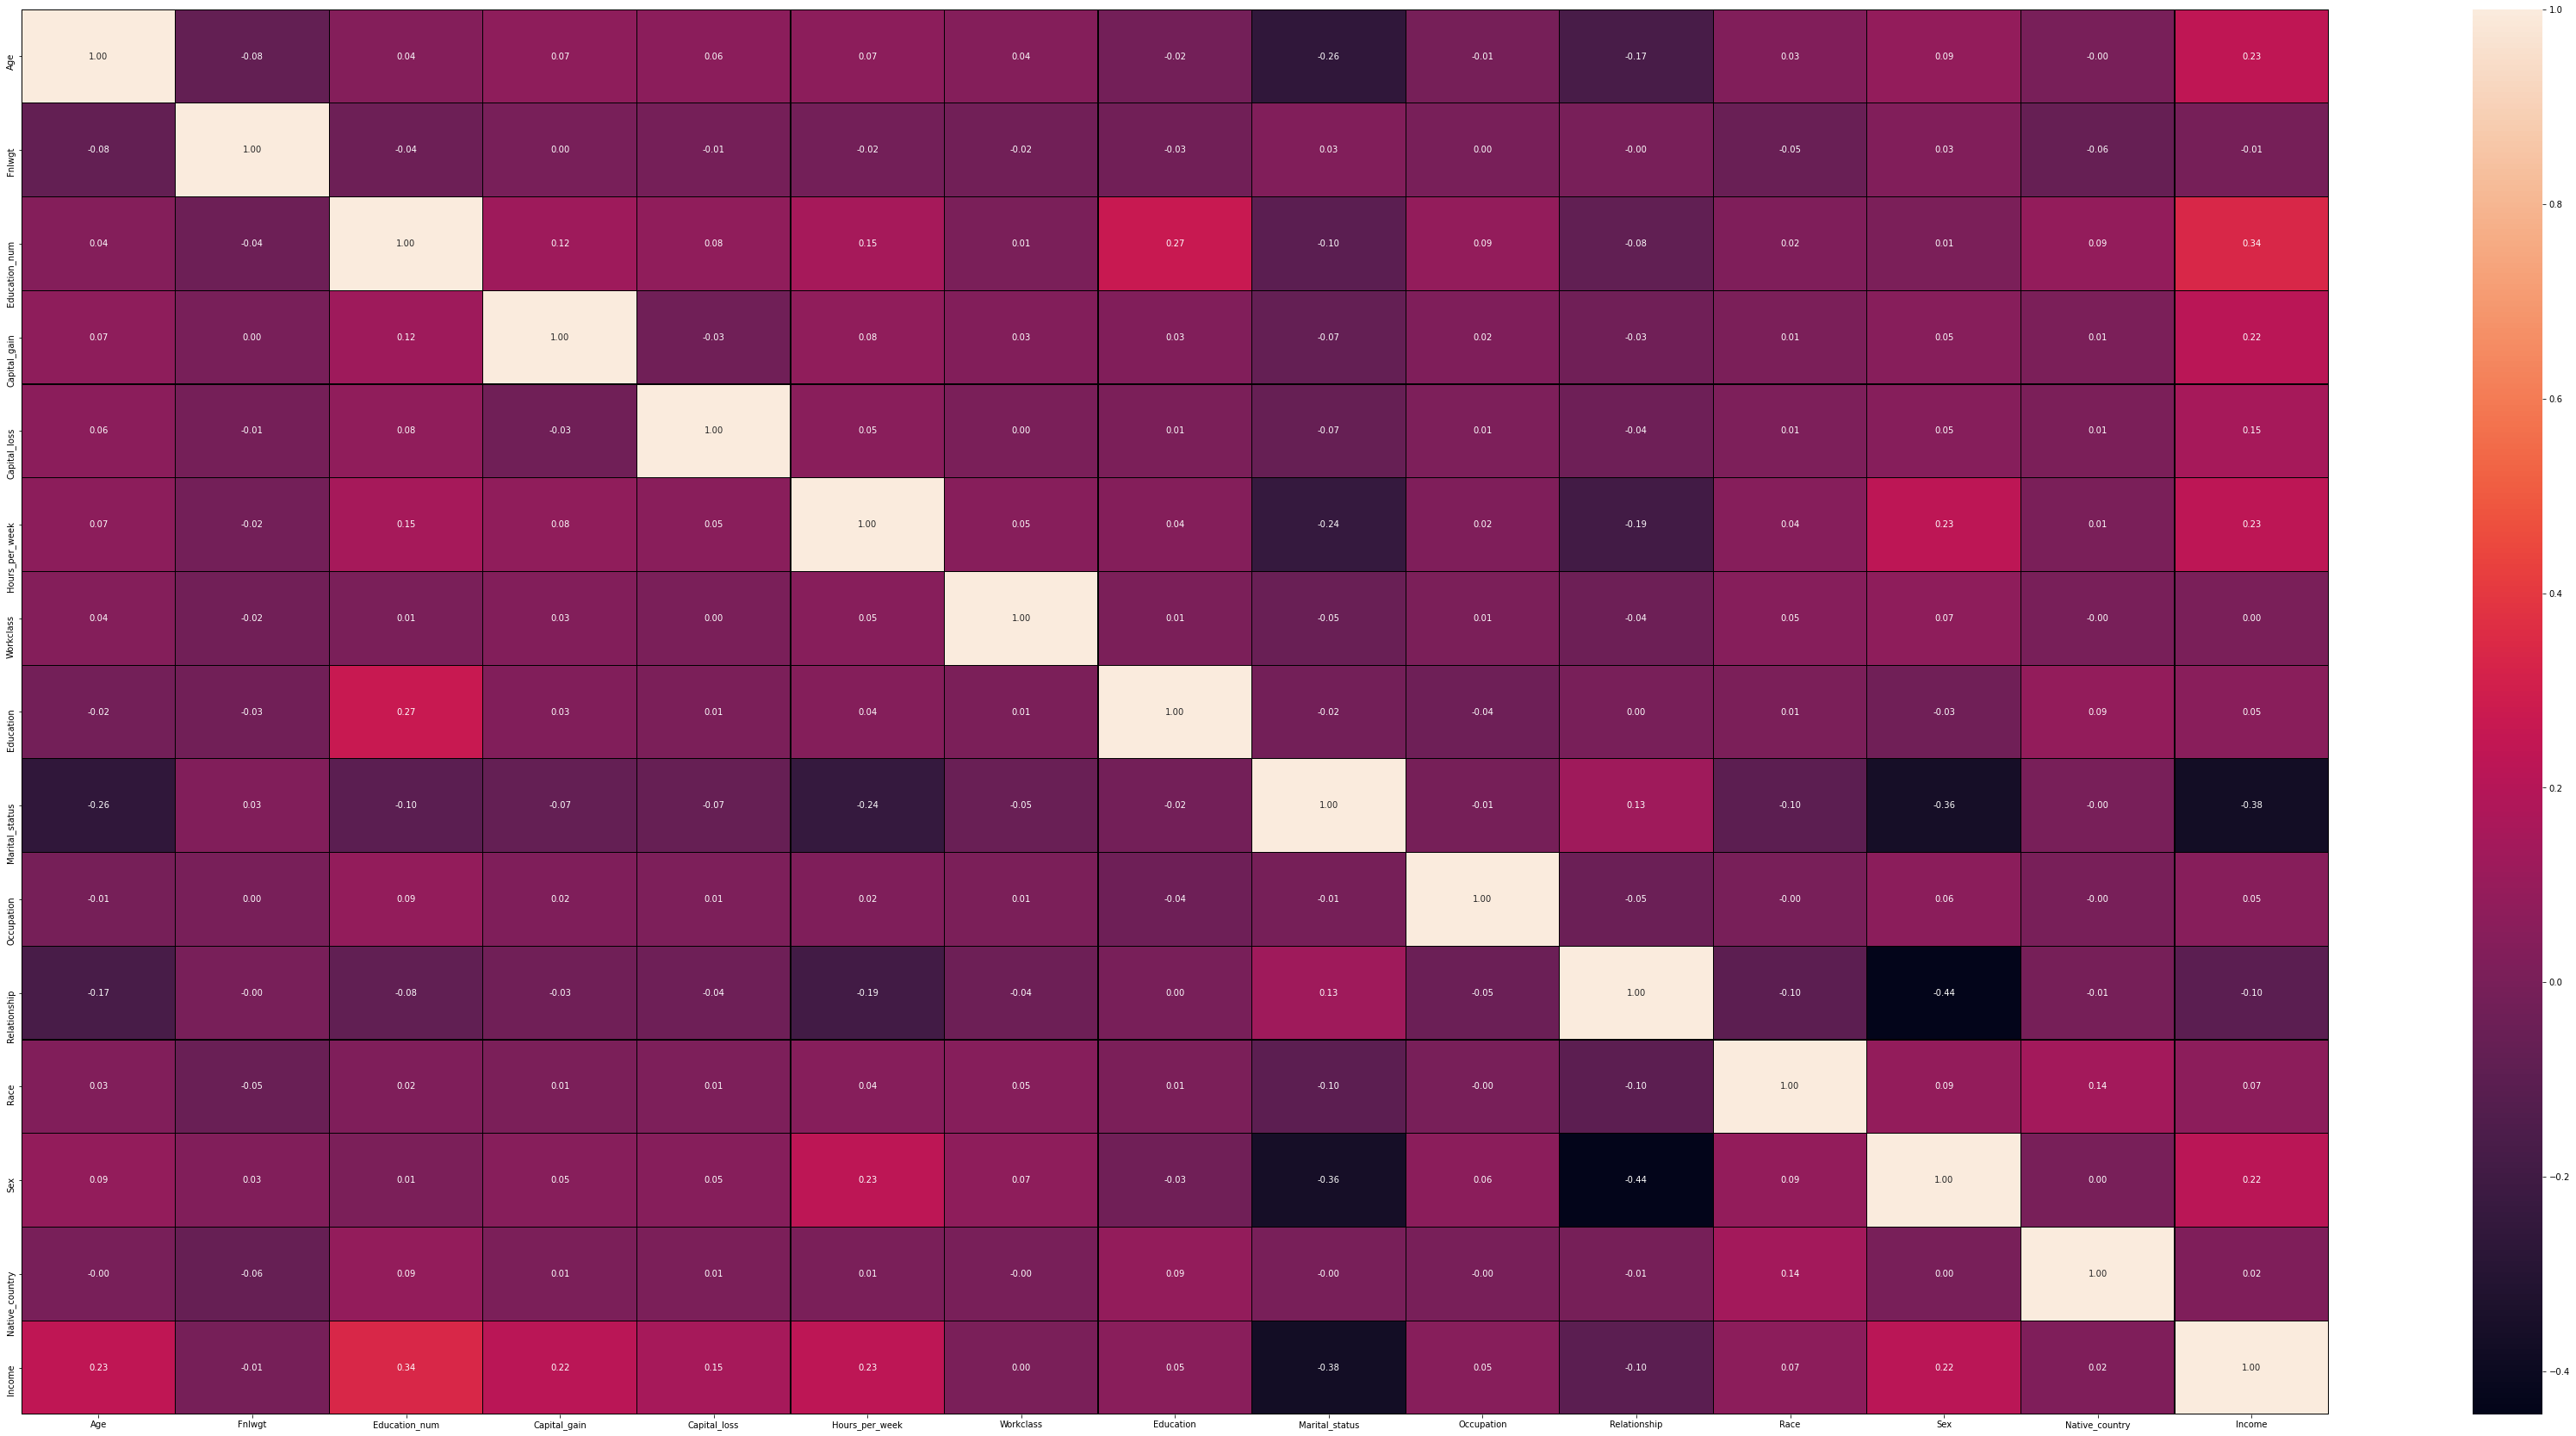

In [22]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

its shows the corelation of each column with its own and also with the target column we found that column workplace has zero corelation with the target column so will drop it

In [23]:
data.drop(['Workclass'],axis=1,inplace=True)

<AxesSubplot:>

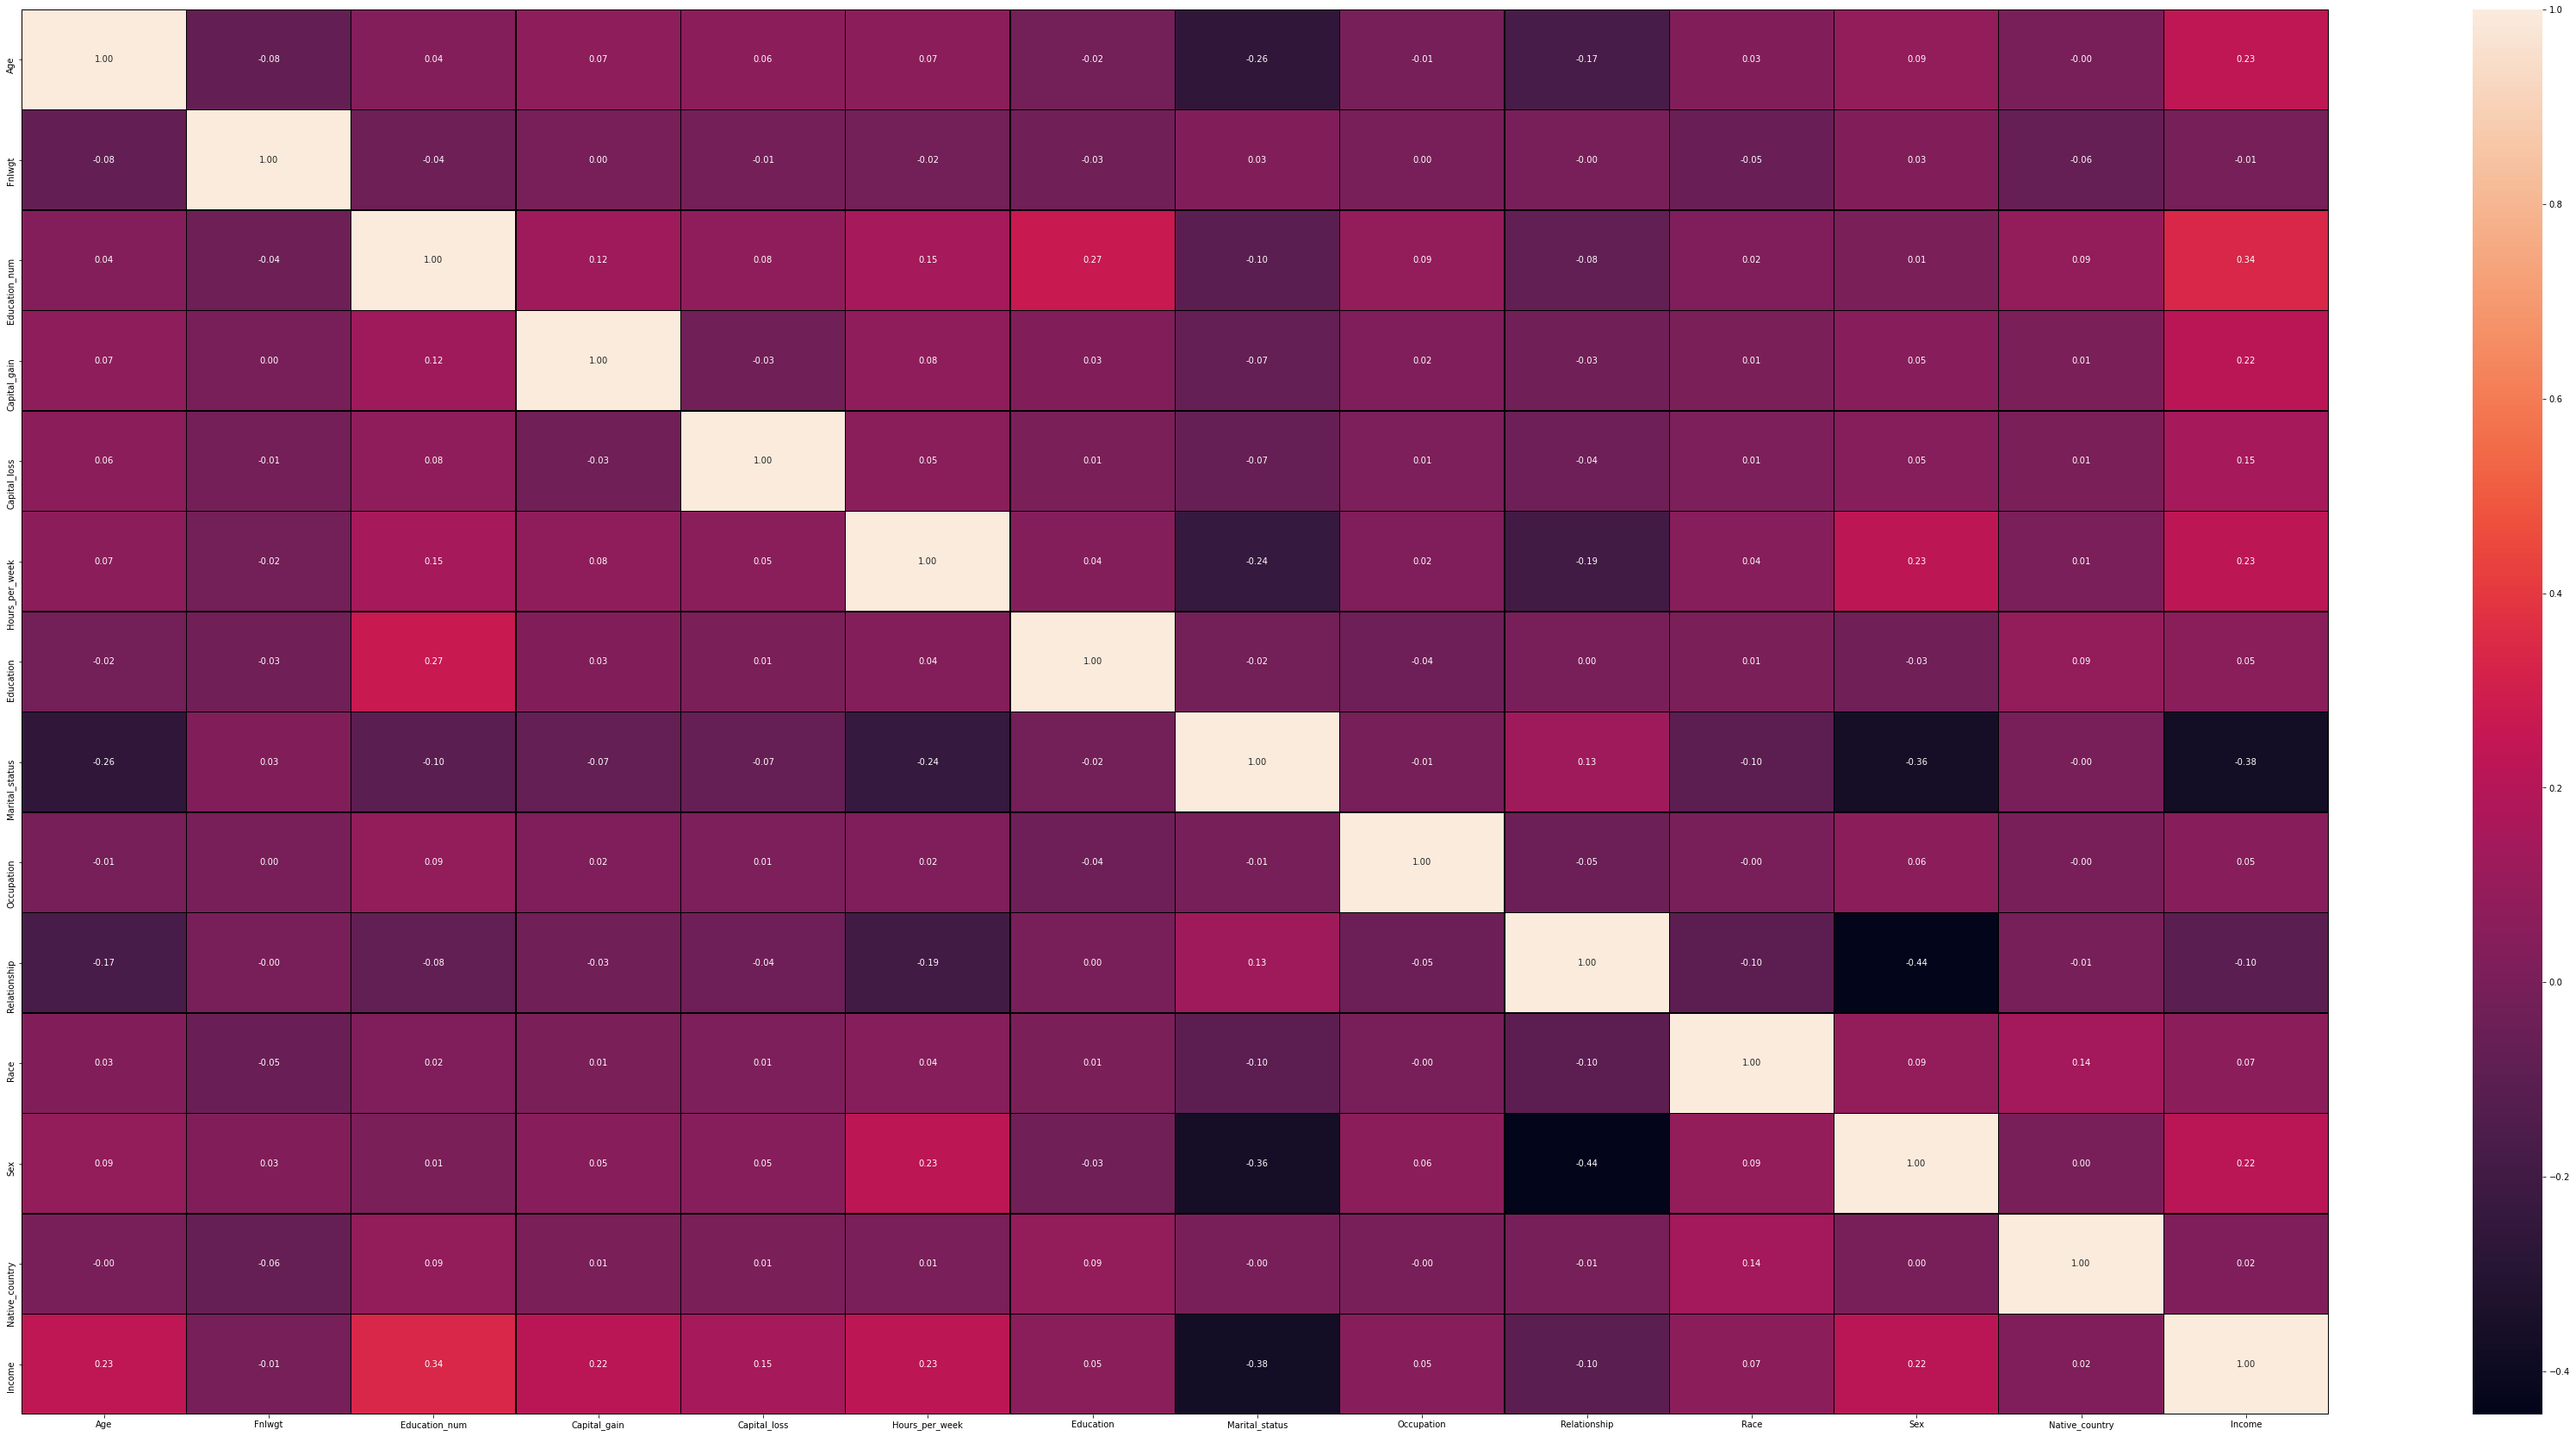

In [24]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

In [25]:
data.shape

(32560, 14)

now will plot the box plot to find out the outliers in various columns

Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Education_num     AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Capital_gain         AxesSubplot(0.125,0.593621;0.227941x0.130172)
Capital_loss      AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Hours_per_week    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Education            AxesSubplot(0.125,0.437414;0.227941x0.130172)
Marital_status    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Occupation        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Relationship         AxesSubplot(0.125,0.281207;0.227941x0.130172)
Race              AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Sex               AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Native_country          AxesSubplot(0.125,0.125;0.227941x0.130172)
Income               AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

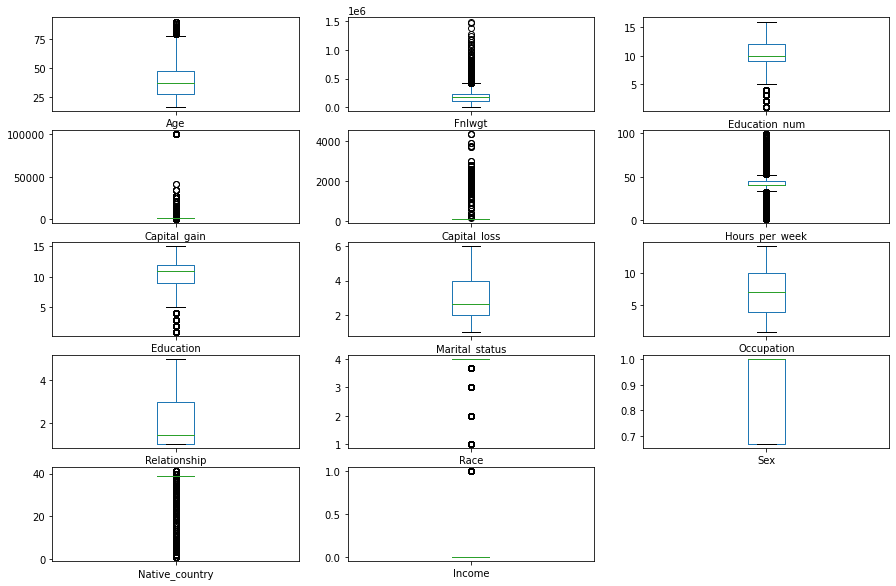

In [26]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(5,3),figsize = (15,10))

In [27]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.83709708 1.0087417  1.13477863 ... 0.70308748 0.2682572  0.5632099 ]
 [0.04264043 0.24504633 0.42002663 ... 0.70308748 0.2682572  0.5632099 ]
 [1.05703146 0.42576955 1.19742926 ... 0.70308748 0.2682572  0.5632099 ]
 ...
 [1.42358875 0.3588108  0.42002663 ... 1.42229812 0.2682572  0.5632099 ]
 [1.21562378 0.11092744 0.42002663 ... 0.70308748 0.2682572  0.5632099 ]
 [0.98372    0.92986178 0.42002663 ... 1.42229812 0.2682572  1.77553698]]


In [28]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(32560, 14)


In [29]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [30]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(32560, 14)
(28075, 14)
Shape after removing outlires (28075, 14)


Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Education_num     AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Capital_gain         AxesSubplot(0.125,0.593621;0.227941x0.130172)
Capital_loss      AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Hours_per_week    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Education            AxesSubplot(0.125,0.437414;0.227941x0.130172)
Marital_status    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Occupation        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Relationship         AxesSubplot(0.125,0.281207;0.227941x0.130172)
Race              AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Sex               AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Native_country          AxesSubplot(0.125,0.125;0.227941x0.130172)
Income               AxesSubplot(0.398529,0.125;0.227941x0.130172)
dtype: object

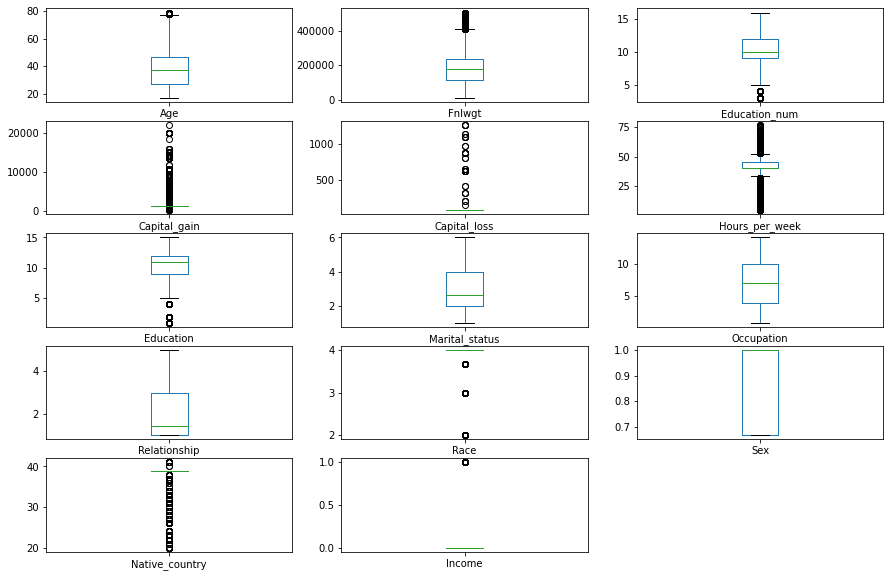

In [31]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(5,3),figsize = (15,10))

In [32]:
data.skew()

Age                0.486078
Fnlwgt             0.625025
Education_num     -0.143948
Capital_gain       5.298304
Capital_loss      30.569301
Hours_per_week    -0.358315
Education         -0.838200
Marital_status     0.745830
Occupation         0.138741
Relationship       1.080299
Race              -2.592692
Sex               -0.686390
Native_country    -5.307362
Income             1.331648
dtype: float64

lets will remove the skewness from the continuous data set

In [33]:
#remove skewness
data['Fnlwgt']=np.sqrt(data['Fnlwgt'])
data['Capital_gain']=np.sqrt(data['Capital_gain'])
data['Capital_loss']=np.sqrt(data['Capital_loss'])


In [34]:
data.skew()

Age                0.486078
Fnlwgt            -0.118242
Education_num     -0.143948
Capital_gain       4.399837
Capital_loss      28.251455
Hours_per_week    -0.358315
Education         -0.838200
Marital_status     0.745830
Occupation         0.138741
Relationship       1.080299
Race              -2.592692
Sex               -0.686390
Native_country    -5.307362
Income             1.331648
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

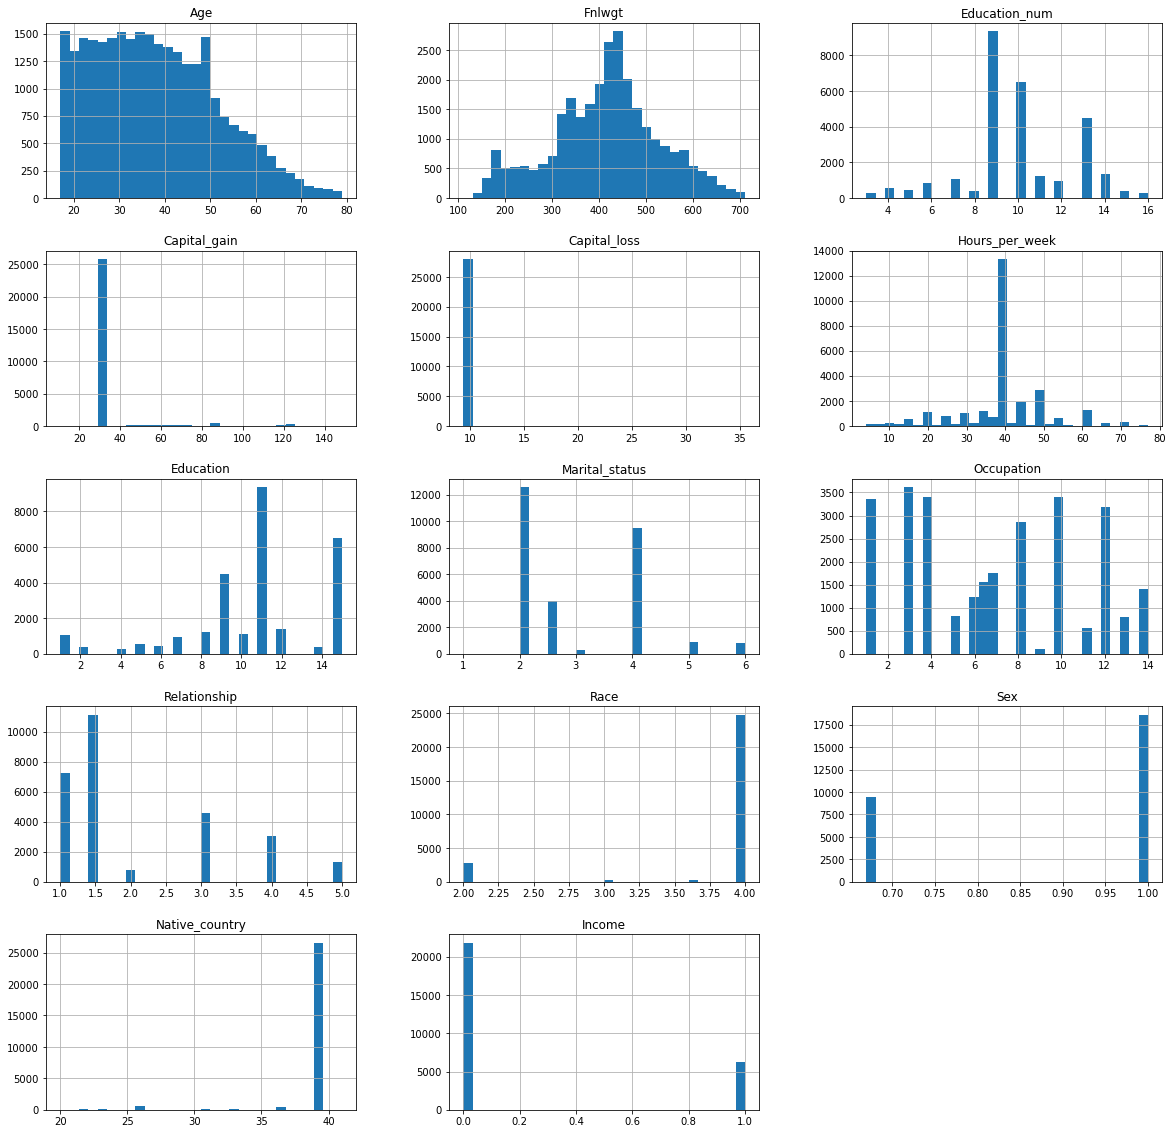

In [35]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (5,3), bins = 30)

plot shows the distribution of data

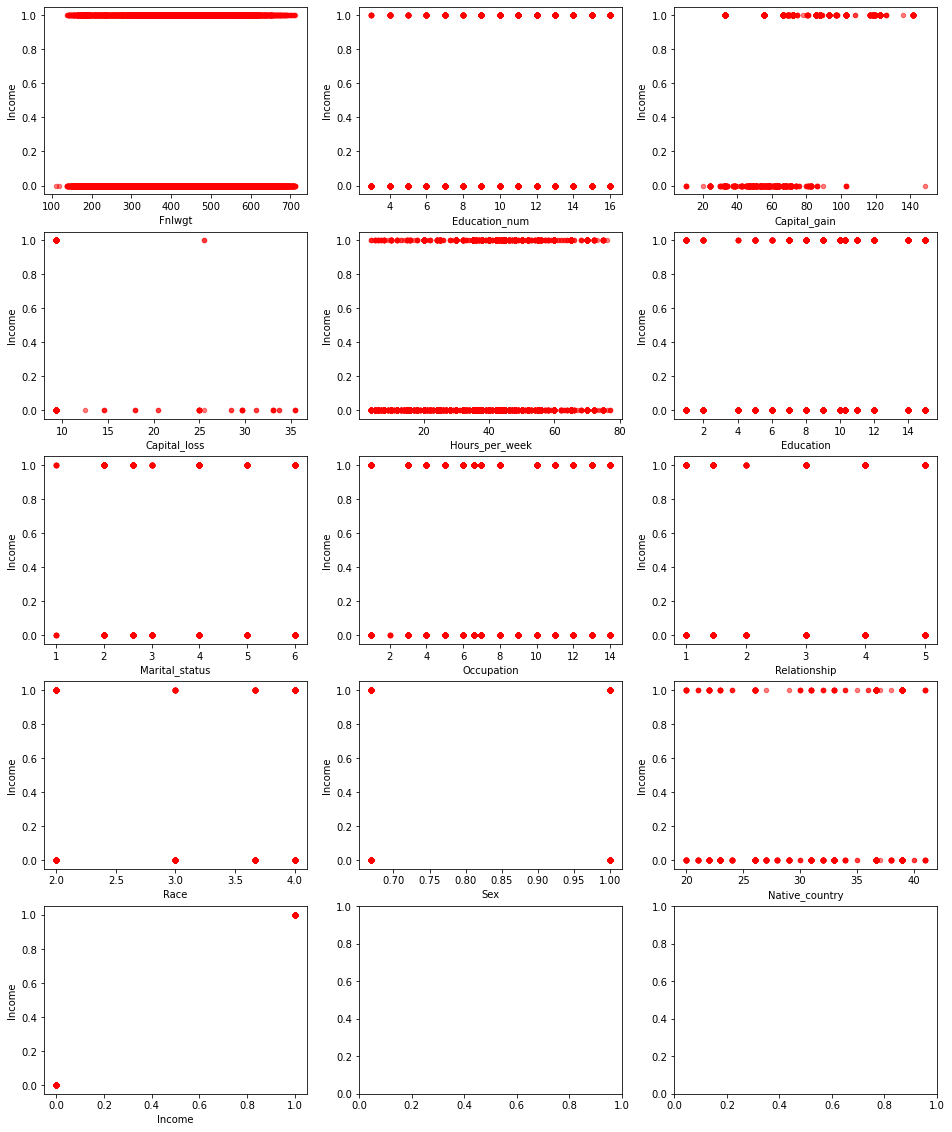

In [36]:
# setup figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='Income', ax=ax, alpha=0.5, color='r')


In [37]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['Income'])
y = data[["Income"]]
print(x.shape)
print(y.shape)

(28075, 13)
(28075, 1)


In [38]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.88566305, -1.11193997,  1.21654064, ...,  0.34873322,
         0.71406979,  0.20225196],
       [-0.01073604,  0.429399  , -0.4379452 , ...,  0.34873322,
         0.71406979,  0.20225196],
       [ 1.10976283,  0.60571425, -1.26518812, ..., -2.97094632,
         0.71406979,  0.20225196],
       ...,
       [ 1.48326245, -0.22506431, -0.4379452 , ...,  0.34873322,
        -1.40042334,  0.20225196],
       [-1.20593482,  0.29345018, -0.4379452 , ...,  0.34873322,
         0.71406979,  0.20225196],
       [ 1.0350629 ,  1.06273081, -0.4379452 , ...,  0.34873322,
        -1.40042334,  0.20225196]])

# Building Model

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("bestbaccuracy is",maxAccu,"on random state",maxRS)        

bestbaccuracy is 0.8584149599287623 on random state 94


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=maxRS)

In [44]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
preddt=log_reg.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8462451766102701
[[4987  341]
 [ 695  715]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5328
           1       0.68      0.51      0.58      1410

    accuracy                           0.85      6738
   macro avg       0.78      0.72      0.74      6738
weighted avg       0.84      0.85      0.84      6738



In [45]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8046898189373701
[[4601  727]
 [ 589  821]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      5328
           1       0.53      0.58      0.56      1410

    accuracy                           0.80      6738
   macro avg       0.71      0.72      0.71      6738
weighted avg       0.81      0.80      0.81      6738



In [46]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8582665479370734
[[4944  384]
 [ 571  839]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5328
           1       0.69      0.60      0.64      1410

    accuracy                           0.86      6738
   macro avg       0.79      0.76      0.77      6738
weighted avg       0.85      0.86      0.85      6738



In [47]:
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.838379341050757
[[4811  517]
 [ 572  838]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5328
           1       0.62      0.59      0.61      1410

    accuracy                           0.84      6738
   macro avg       0.76      0.75      0.75      6738
weighted avg       0.84      0.84      0.84      6738



We achieve the best results using — ‘RandomForestClassifier’, which provides an accuracy of 86%.Hence we choose ‘RandomForestClassifier’ as our final model 

# AUC-ROC curve

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

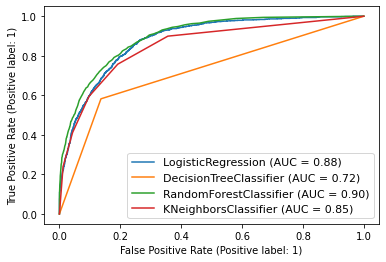

In [49]:
disp=plot_roc_curve(log_reg,x_test,y_test)
disp=plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

curve shows RandomForestClassifier is best fit model based on accuracy

# cross validation

In [50]:
for i in range(3,9):
    cv=cross_val_score(rf,x,y,cv=i)
    print(rf,cv.mean())

RandomForestClassifier() 0.8497240395829917
RandomForestClassifier() 0.8500089434812182
RandomForestClassifier() 0.8495458593054319
RandomForestClassifier() 0.8508996446509803
RandomForestClassifier() 0.8505436465821591
RandomForestClassifier() 0.8512204169335831


This helps us interpret that the model is not overfitting and will perform well for new data that we feed to our model. 

# model saving

In [51]:
import joblib

In [52]:
joblib.dump(rf,'census_income_final')

['census_income_final']

# conclusion

We further proceed to test the object that we saved 

In [53]:
Model=joblib.load('census_income_final')
result=Model.predict(x_test)
accuracy_score(y_test,result)

0.8582665479370734

This marks the end of our process; we have successfully trained our model to predict the income of a person, with an accuracy of ~86%.